In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn
from scipy import stats

from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import lightgbm



In [2]:
# To manipulate data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from lightgbm import LGBMRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.listdir('../input/milktrade/')

['Soytrade.csv']

In [4]:
data = pd.read_csv('../input/milktrade/Soytrade.csv')

In [5]:
#data = pd.read_csv('../input/sugar22july/sugartrade.csv')
data = data[data['year']<2018]

In [6]:
data=data[data['value']>0]

In [7]:
data.head()

,Unnamed: 0,country_d,country_o,year,value,iso3_d,dynamic_code_d,landlocked_d,island_d,region_d,...,hostility_level_o,hostility_level_d,distance,common_language,colony_of_destination_after45,colony_of_destination_current,colony_of_destination_ever,colony_of_origin_after45,colony_of_origin_current,colony_of_origin_ever
11,12,Afghanistan,United Kingdom,1962,3.427,AFG,AFG,1,0,middle_east,...,0,0,5687.343,0,0,0,0,0,0,0
13,14,Afghanistan,India,1962,0.730,AFG,AFG,1,0,middle_east,...,0,0,1859.353,0,0,0,0,0,0,0
19,20,Afghanistan,Lebanon,1962,5.622,AFG,AFG,1,0,middle_east,...,0,0,2957.696,0,0,0,0,0,0,0
20,21,Afghanistan,Netherlands,1962,58.250,AFG,AFG,1,0,middle_east,...,0,0,5264.688,0,0,0,0,0,0,0
29,30,Afghanistan,United States,1962,28.580,AFG,AFG,1,0,middle_east,...,0,0,11622.314,0,0,0,0,0,0,0


In [8]:
continents = ['Netherlands','Germany','France','New Zealand','United Kingdom']
data = data[data.country_o.isin(continents)]
data.shape

(19930, 72)

In [9]:
df5 = data[data['year'] < 2010]

In [10]:
y=data['value']

In [11]:
train = data.iloc[ :df5.shape[0]]
test = data.iloc[df5.shape[0]:]
trainy = y.iloc[:df5.shape[0]]
testy = y.iloc[df5.shape[0]:]

In [12]:
df20 = test[['country_o','country_d','year']]

In [13]:
data = pd.get_dummies(data)
#y=data['value']

In [14]:
data = data[['year','landlocked_d','island_d','pop_d','gdp_wdi_cap_cur_d','lat_d','lng_d',
'polity_d','landlocked_o','island_o','pop_o','gdp_wdi_cap_cur_o','lat_o','lng_o','polity_o','contiguity','agree_pta_goods','agree_pta_services',
'agree_cu','agree_eia','agree_fta','sanction_threat_trade','sanction_imposition_trade','member_eu_o','member_wto_o','member_gatt_o',
'member_eu_d','member_wto_d','member_gatt_d','hostility_level_o','hostility_level_d','distance','common_language','colony_of_destination_ever',
'colony_of_origin_ever']]

In [15]:
#data=data.drop(['value','Unnamed: 0','gdp_wdi_cur_d','gdp_wdi_const_d','gdp_wdi_cap_cur_d','gdp_wdi_cap_const_d',
 #            'gdp_pwt_cur_o','gdp_wdi_cur_o','gdp_wdi_const_o','gdp_wdi_cap_cur_o','gdp_wdi_cap_const_o','gdp_pwt_cur_d'],axis=1)
df5 = data[data['year'] < 2010]
df5.shape

(16141, 35)

In [16]:
train = data.iloc[ :df5.shape[0]]
test = data.iloc[df5.shape[0]:]
trainy = y.iloc[:df5.shape[0]]
testy = y.iloc[df5.shape[0]:]

In [17]:
df5 = train[train['year'] < 2005]
df5.shape

(13391, 35)

In [18]:
X_train = train.iloc[ :df5.shape[0]]
X_val = train.iloc[df5.shape[0]:]
y_train = trainy.iloc[:df5.shape[0]]
y_val = trainy.iloc[df5.shape[0]:]

In [19]:
print(X_train.shape)
print(X_val.shape)
print(test.shape)

(13391, 35)
(2750, 35)
(3789, 35)


In [20]:
import lightgbm
lgtrain = lightgbm.Dataset(train,trainy)
lgvalid = lightgbm.Dataset(test,testy)

In [21]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}
lgb_clf = lgb.train(
    params,
    lgtrain,
    500,
    valid_sets=[lgtrain, lgvalid],
    valid_names=["train", "valid"],
    early_stopping_rounds=50,
    verbose_eval=500
)
#print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

Training until validation scores don't improve for 50 rounds.
[500]	train's rmse: 3428.2	valid's rmse: 85259.9
Did not meet early stopping. Best iteration is:
[500]	train's rmse: 3428.2	valid's rmse: 85259.9


In [22]:
print("RMSE of the validation set:", r2_score(testy, lgb_clf.predict(test)))

RMSE of the validation set: 0.29673068320012785


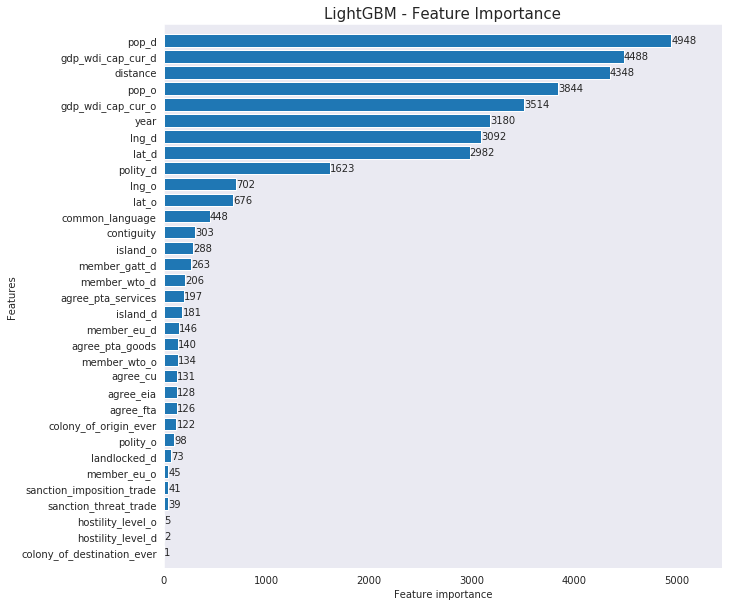

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(lgb_clf,height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [24]:
import xgboost
best_xgb_model = xgboost.XGBRegressor()
best_xgb_model.fit(train,trainy)
print("RMSE of the validation set:", r2_score(testy, best_xgb_model.predict(test)))

[14:21:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of the validation set: 0.28147216472209224


In [25]:
feat_names = train.columns.values
importances = best_xgb_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_xgb_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="c", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'

In [26]:
from sklearn import ensemble
import matplotlib.pyplot as plt
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train, trainy)
from sklearn.metrics import r2_score
r2_score(testy,model.predict(test))

0.3422894480774732

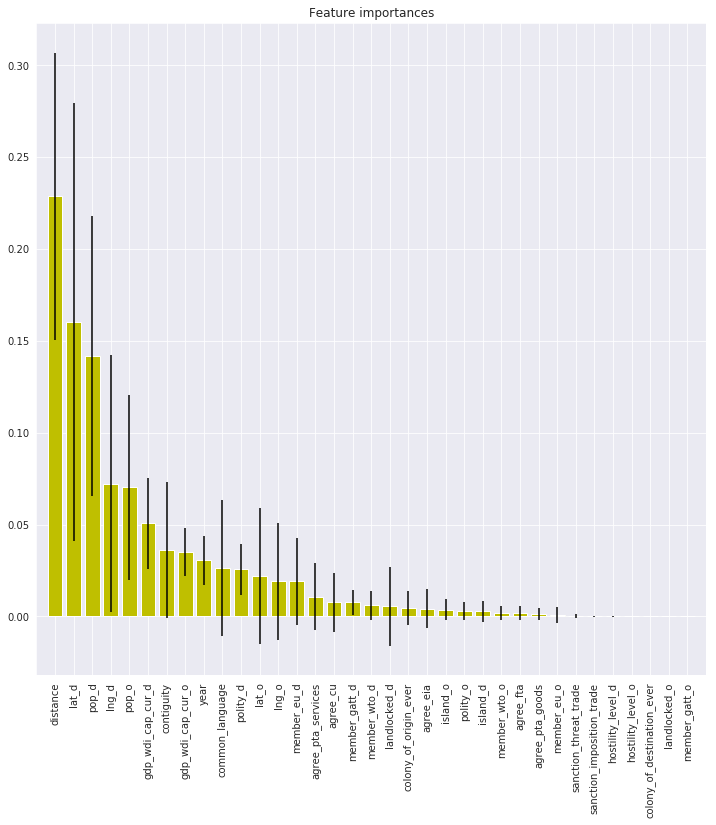

In [27]:
feat_names = train.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [28]:
from sklearn import ensemble
import matplotlib.pyplot as plt
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train, trainy)
from sklearn.metrics import r2_score
r2_score(testy,model.predict(test))

0.3795215463967626

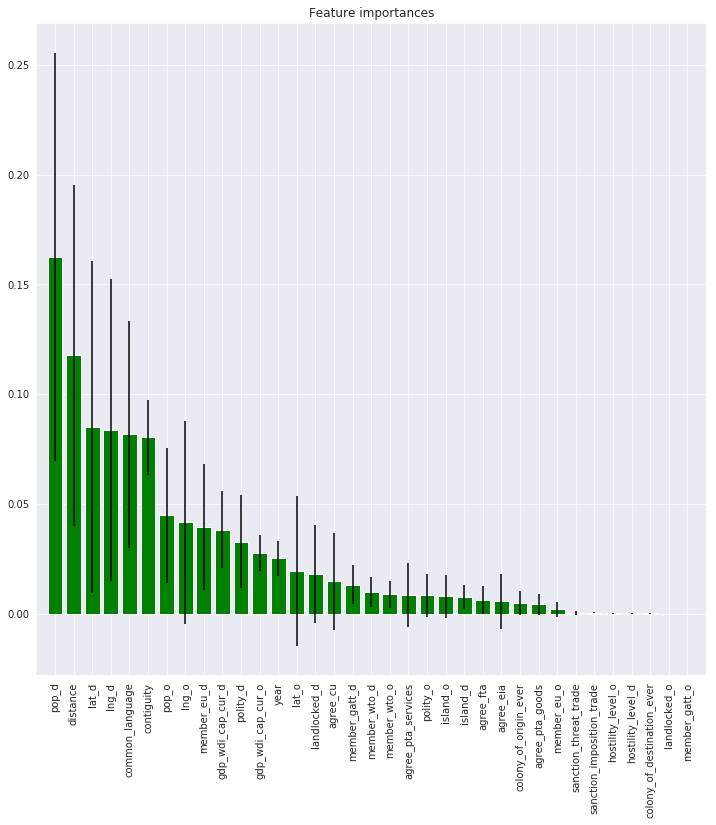

In [29]:
feat_names = train.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [30]:
LGBPRED=lgb_clf.predict(test)
df20.to_csv('df20.csv')
testy.to_csv('testy.csv')
pd.DataFrame(LGBPRED).to_csv('LGBPRED.csv')